In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [46]:
def reg_graph_subplot(x, y, data, sct_size=None, s=10, title='', legend_visibility=True, legend_title='', xlabel='', ylabel='', fit_intercept=True, ativar_grafico_yx=False, reg_from_start=False, offset_txt_x=0.15, offset_txt_y=2.25, num_rows=1, num_cols=1, subplot_num=1, axes=None):
    # x = eixo x do gráfico
    # y = eixo y do gráfico
    # data = dataframe origem dos dados que representam x e y
    # sct_size = tamanho do scatter no gráfico BASEADO em uma coluna do dataframe
    # s = tamanho do scatter no gráfico BASEADO em um NUMERO
    # title = título do gráfico
    # legend_visibility = visibilidade da legenda
    # legend_title = título da legenda
    # xlabel = título do eixo x
    # ylabel = titulo do eixo y
    # offset_txt_x = deslocamento do texto da função no eixo x
    # offset_txt_y = deslocamento do texto da função no eixo y
    # num_rows = número de linhas de subplots
    # num_cols = número de colunas de subplots
    # subplot_num = número do subplot atual
    # axes = array de eixos para os subplots

    sns.set_style('darkgrid')

    if axes is None:
        f, ax = plt.subplots(num_rows, num_cols, figsize=(12, 5))
        ax = ax.flatten()
        ax = ax[subplot_num - 1]
    else:
        ax = axes[subplot_num - 1]

    sns.scatterplot(x=data[x], y=data[y], data=data, size=sct_size, s=s, ax=ax)

    rng = np.random.default_rng(1234)  # seed para valores aleatórios
    lr = LinearRegression(fit_intercept=fit_intercept)
    fitted_reg = lr.fit(data[[x]], data[[y]])

    if not fit_intercept:
        fitted_reg.intercept_ = [fitted_reg.intercept_]  # Prevenindo erros

    r2_score = fitted_reg.score(data[[x]], data[[y]])  # R² Score
    x_reg_line = rng.uniform(data[x].min(), data[x].max(), size=100)  # gerando valores entre os valores do scatterplot para criar a reta
    y_reg_line = x_reg_line * fitted_reg.coef_ + fitted_reg.intercept_[0]  # função y=ax + b para representar a reta criada

    if reg_from_start:

        if (data[x].min() < 0) and (abs(data[x].min()) > data[y].max()):  # Para valores data[x] negativos

            x_reg_line = rng.uniform(data[x].min() * 2, 0.0, size=10000)  # gerando valores entre os valores do scatterplot para criar a reta, partindo do 0

        elif (data[y].min() < 0) and (abs(data[y].min()) > data[x].max()):  # Para valores data[y] negativos

            x_reg_line = rng.uniform(data[y].min() * 2, 0.0, size=10000)  # gerando valores entre os valores do scatterplot para criar a reta, partindo do 0

        elif (data[x].max() > data[y].max()):

            x_reg_line = rng.uniform(0.0, data[x].max() * 2, size=10000)

        else:

            x_reg_line = rng.uniform(0.0, data[y].max() * 2, size=10000)

        y_reg_line = x_reg_line * fitted_reg.coef_ + fitted_reg.intercept_[0]  # função y=ax + b para representar a reta criada

    text_coord_x = data[x].max() - data[x].max() * offset_txt_x  # eixo x do texto

    ax.text(text_coord_x, offset_txt_y, f'Y={round(fitted_reg.coef_[0][0], 4)}x + {round(fitted_reg.intercept_[0], 4)}',
            fontsize=12, ha='center', va='center', color='blue')  # Texto da reta Azul
    ax.text(text_coord_x, offset_txt_y - (offset_txt_y * 0.3), f'R²:{round(r2_score, 4)}', fontsize=12, ha='center',
            va='center', color='blue')  # Texto r²

    ax.set_ylim((0, (data[y].max() + (data[y].max() / 2))))  # tamanho limite do plot no eixo y
    ax.set_xlim((0, data[x].max() + data[x].max() / 2))  # tamanho limite do plot no eixo x
    ax.plot(x_reg_line, y_reg_line[0])  # reta de regressão

    if ativar_grafico_yx:
        y_x = rng.uniform(0, 1000, size=1000)  # gerando 1000 valores aleatórios
        ax.plot(y_x, y_x, 'k--')  # reta y=x

    if legend_title:
        ax.legend(title=legend_title, loc='upper left').set_visible(legend_visibility)  # legenda no canto superior esquerdo

    ax.set_title(title)  # Título do gráfico
    ax.set_xlabel(xlabel)  # Título do eixo X
    ax.set_ylabel(ylabel)  # Título do eixo y

    return ax

In [16]:
ameriflux = pd.read_csv('../../TORRE DE SANTAREM/Dataset/ameriflux-santarem-dados-original.csv',na_values=-9999) # Dados da AMERIFLUX
modis = pd.read_csv('./DadosNPPSatelite/filtered_scaled_Npp_500m.csv',header=None)

In [17]:
ameriflux['datetime'] = ameriflux['Date'] + ' ' + ameriflux['Time']
ameriflux['datetime'] = pd.to_datetime(ameriflux['datetime'])

ameriflux = ameriflux.drop(['Hour','Time','Year','DoY'],axis=1)
ameriflux.index = ameriflux['datetime']

ameriflux = ameriflux.resample('Y').mean()

In [18]:
ameriflux[['NEE_uStar_f','Reco_uStar','GPP_uStar_f']].to_csv('ameriflux_resampled.csv',index=False)

In [19]:
nee_data = pd.read_csv('./resultado_variaveis.csv') # !!!!!!!RODAR CÓDIGO R ANTES DE EXECUTAR

ameriflux['NEE_uStar_f'] = nee_data['NEE_uStar_f'].values

ameriflux['NEE_uStar_f'].head()

datetime
2009-12-31   -0.183732
2010-12-31   -0.344274
2011-12-31   -0.374439
Freq: A-DEC, Name: NEE_uStar_f, dtype: float64

In [20]:
nee_data

,NEE_uStar_f,Reco_uStar,GPP_uStar_f
0,-0.183732,8.709078,8.892811
1,-0.344274,11.097985,11.442257
2,-0.374439,9.913321,10.287759


In [21]:
df = ameriflux[['GPP_uStar_f','Reco_uStar','NEE_uStar_f']].copy()
df['NPP?'] = df['GPP_uStar_f'] - df['Reco_uStar'] 
df[['NPP?','NEE_uStar_f']] # Linhas não nulas de nee


# A base de dados do ameriflux BASE seguem essa formatação para upload:
# https://ameriflux.lbl.gov/data/uploading-half-hourly-hourly-data/

# Why does negative NEE define an net uptake of the ecosystem? (#NEEsign)
# NEE was defined by meteorologists from an atmosphere perspective. Positive flux goes into the atmosphere and out the land ecosystem. Negative fluxes go into the ecosystem.
# GPP on the other hand is defined as a positive allocation to the ecosystem, and Ecosystem respiration is defined as a loss of carbon from the ecosystem. 
# For mosts ecologists it helps to argue with the -NEE flux: net uptake -NEE = GPP - Reco.

# Why does daytime GPP - Reco does not match -NEE? (#daytimeGPP)
# With nighttime partitioning, GPP is computed by difference of NEE and modeled Reco.
# However, with daytime partitioning, both GPP and Reco are model predictions of two different models. 
# Both have an prediction error, hence, they do not exactly match up to original NEE.

,NPP?,NEE_uStar_f
datetime,,
2009-12-31,0.177049,-0.183732
2010-12-31,0.331749,-0.344274
2011-12-31,0.360818,-0.374439


In [22]:
def modis_npp(modis_data):
    
    modis_data = modis_data.loc[modis[2].isin(['A2009001','A2010001','A2011001'])].copy() # Dados de NPP nos anos de 2009, 2010 e 2011
    
    modis_data = modis_data.drop([0,1,3,4],axis=1).reset_index().drop('index',axis=1) # Retirando colunas com informações não relevantes e restabelecendo o dataframe a partir de um index 0 nas 2 linhas
    
    modis_data.columns = range(len(modis_data.columns.to_list())) # Reiniciando o index a partir do 0 para as colunas 
    
    modis_data.set_index(0,inplace=True) # Colocando o "Acquisition Date [ A (YYYYDDD) ]"  como index para legibilidade do dataframe
    
    modis_npp_mean = modis_data.mean(axis=1) # Média de NPP nesses anos 
    
    return modis_npp_mean

modis_npp_mean = modis_npp(modis)

In [23]:
modis_data_tower = modis.loc[modis[2].isin(['A2009001','A2010001','A2011001']),(17 * 8) + (9 + 4)].copy() # Dados de NPP nos anos de 2009, 2010 e 2011

In [24]:
ameriflux['NPP GPP - RECO'] = ameriflux['GPP_uStar_f'] - ameriflux['Reco_uStar'] 
ameriflux['NPP NEE + RECO'] = ameriflux['NEE_uStar_f'] + ameriflux['Reco_uStar'] # Outro cálculo para o NPP
ameriflux['NPP (-NEE)'] = (ameriflux['NEE_uStar_f']) * -1

npp_dataframe = {
    'NPP GPP - RECO':ameriflux['NPP GPP - RECO'].values,
    'NPP NEE + RECO': ameriflux['NPP NEE + RECO'].values,
    'NPP (-NEE)': ameriflux['NPP (-NEE)'].values,
    'modis_NPP':modis_npp_mean.values,
    'Modis Tower Pixel': modis_data_tower.values
}
npp_dataframe = pd.DataFrame(npp_dataframe,index=['2009','2010','2011'])
npp_dataframe
# os valores de npp do modis estão "escalados" de acordo com o csv de "data scaled and filtered" do site 
# apesar do cálculo de npp da torre estar correto, ele difere dos de satélite quando este está escalado e no mesmo formato do mapa

,NPP GPP - RECO,NPP NEE + RECO,NPP (-NEE),modis_NPP,Modis Tower Pixel
2009,0.177049,8.208535,0.183732,1.204458,1.2145
2010,0.331749,10.349998,0.344274,1.183961,1.1974
2011,0.360818,9.178263,0.374439,1.227251,1.2367


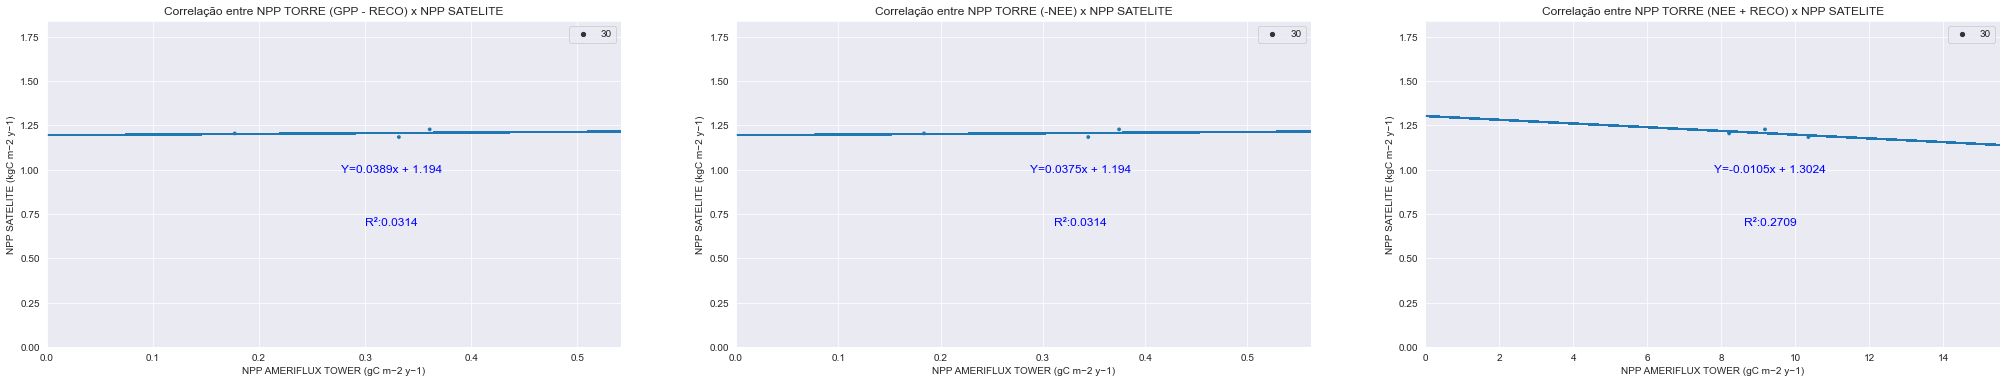

In [59]:
fig, ax = plt.subplots(1, 3, figsize=(35, 6))

eixo_x = 'NPP GPP - RECO'
eixo_x2 = 'NPP (-NEE)'
eixo_x3 = 'NPP NEE + RECO'

eixo_y = 'modis_NPP'
data = npp_dataframe
xlabel = "NPP AMERIFLUX TOWER (gC m−2 y−1)"
ylabel = "NPP SATELITE (kgC m−2 y−1)"


title = "Correlação entre NPP TORRE (GPP - RECO) x NPP SATELITE"
title2 = "Correlação entre NPP TORRE (-NEE) x NPP SATELITE"
title3 = "Correlação entre NPP TORRE (NEE + RECO) x NPP SATELITE"


reg_graph_subplot(eixo_x,eixo_y,sct_size=30,data=data,xlabel=xlabel,ylabel=ylabel,title=title,legend_visibility=False,reg_from_start=True,offset_txt_x=0.1,offset_txt_y=1,axes=ax, subplot_num=1)
reg_graph_subplot(eixo_x2,eixo_y,sct_size=30,data=data,xlabel=xlabel,ylabel=ylabel,title=title2,legend_visibility=False,reg_from_start=True,offset_txt_x=0.1,offset_txt_y=1,axes=ax, subplot_num=2)
reg_graph_subplot(eixo_x3,eixo_y,sct_size=30,data=data,xlabel=xlabel,ylabel=ylabel,title=title3,legend_visibility=False,reg_from_start=True,offset_txt_x=0.1,offset_txt_y=1,axes=ax, subplot_num=3)

plt.show()

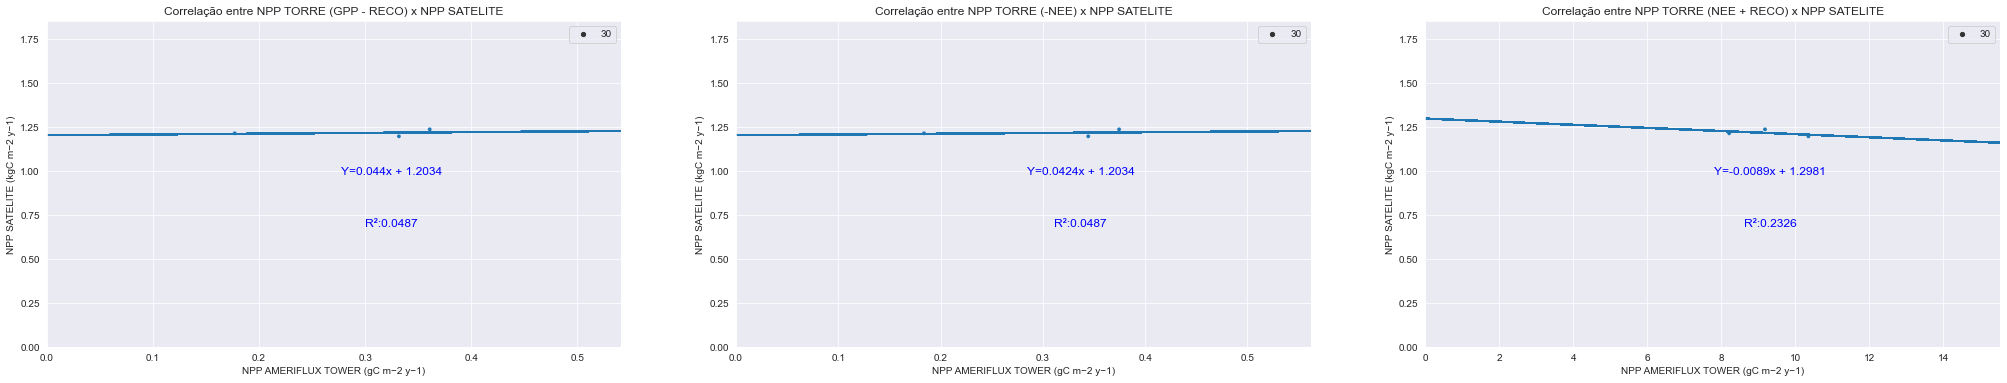

In [62]:
fig, ax = plt.subplots(1, 3, figsize=(35, 6))

eixo_x = 'NPP GPP - RECO'
eixo_x2 = 'NPP (-NEE)'
eixo_x3 = 'NPP NEE + RECO'

eixo_y = 'Modis Tower Pixel'
data = npp_dataframe
xlabel = "NPP AMERIFLUX TOWER (gC m−2 y−1)"
ylabel = "NPP SATELITE (kgC m−2 y−1)"

title = "Correlação entre NPP TORRE (GPP - RECO) x NPP SATELITE"
title2 = "Correlação entre NPP TORRE (-NEE) x NPP SATELITE"
title3 = "Correlação entre NPP TORRE (NEE + RECO) x NPP SATELITE"

reg_graph_subplot(eixo_x,eixo_y,sct_size=30,data=data,xlabel=xlabel,ylabel=ylabel,title=title,legend_visibility=False,reg_from_start=True,offset_txt_x=0.1,offset_txt_y=1,axes=ax, subplot_num=1)
reg_graph_subplot(eixo_x2,eixo_y,sct_size=30,data=data,xlabel=xlabel,ylabel=ylabel,title=title2,legend_visibility=False,reg_from_start=True,offset_txt_x=0.1,offset_txt_y=1,axes=ax, subplot_num=2)
reg_graph_subplot(eixo_x3,eixo_y,sct_size=30,data=data,xlabel=xlabel,ylabel=ylabel,title=title3,legend_visibility=False,reg_from_start=True,offset_txt_x=0.1,offset_txt_y=1,axes=ax, subplot_num=3)

plt.show()

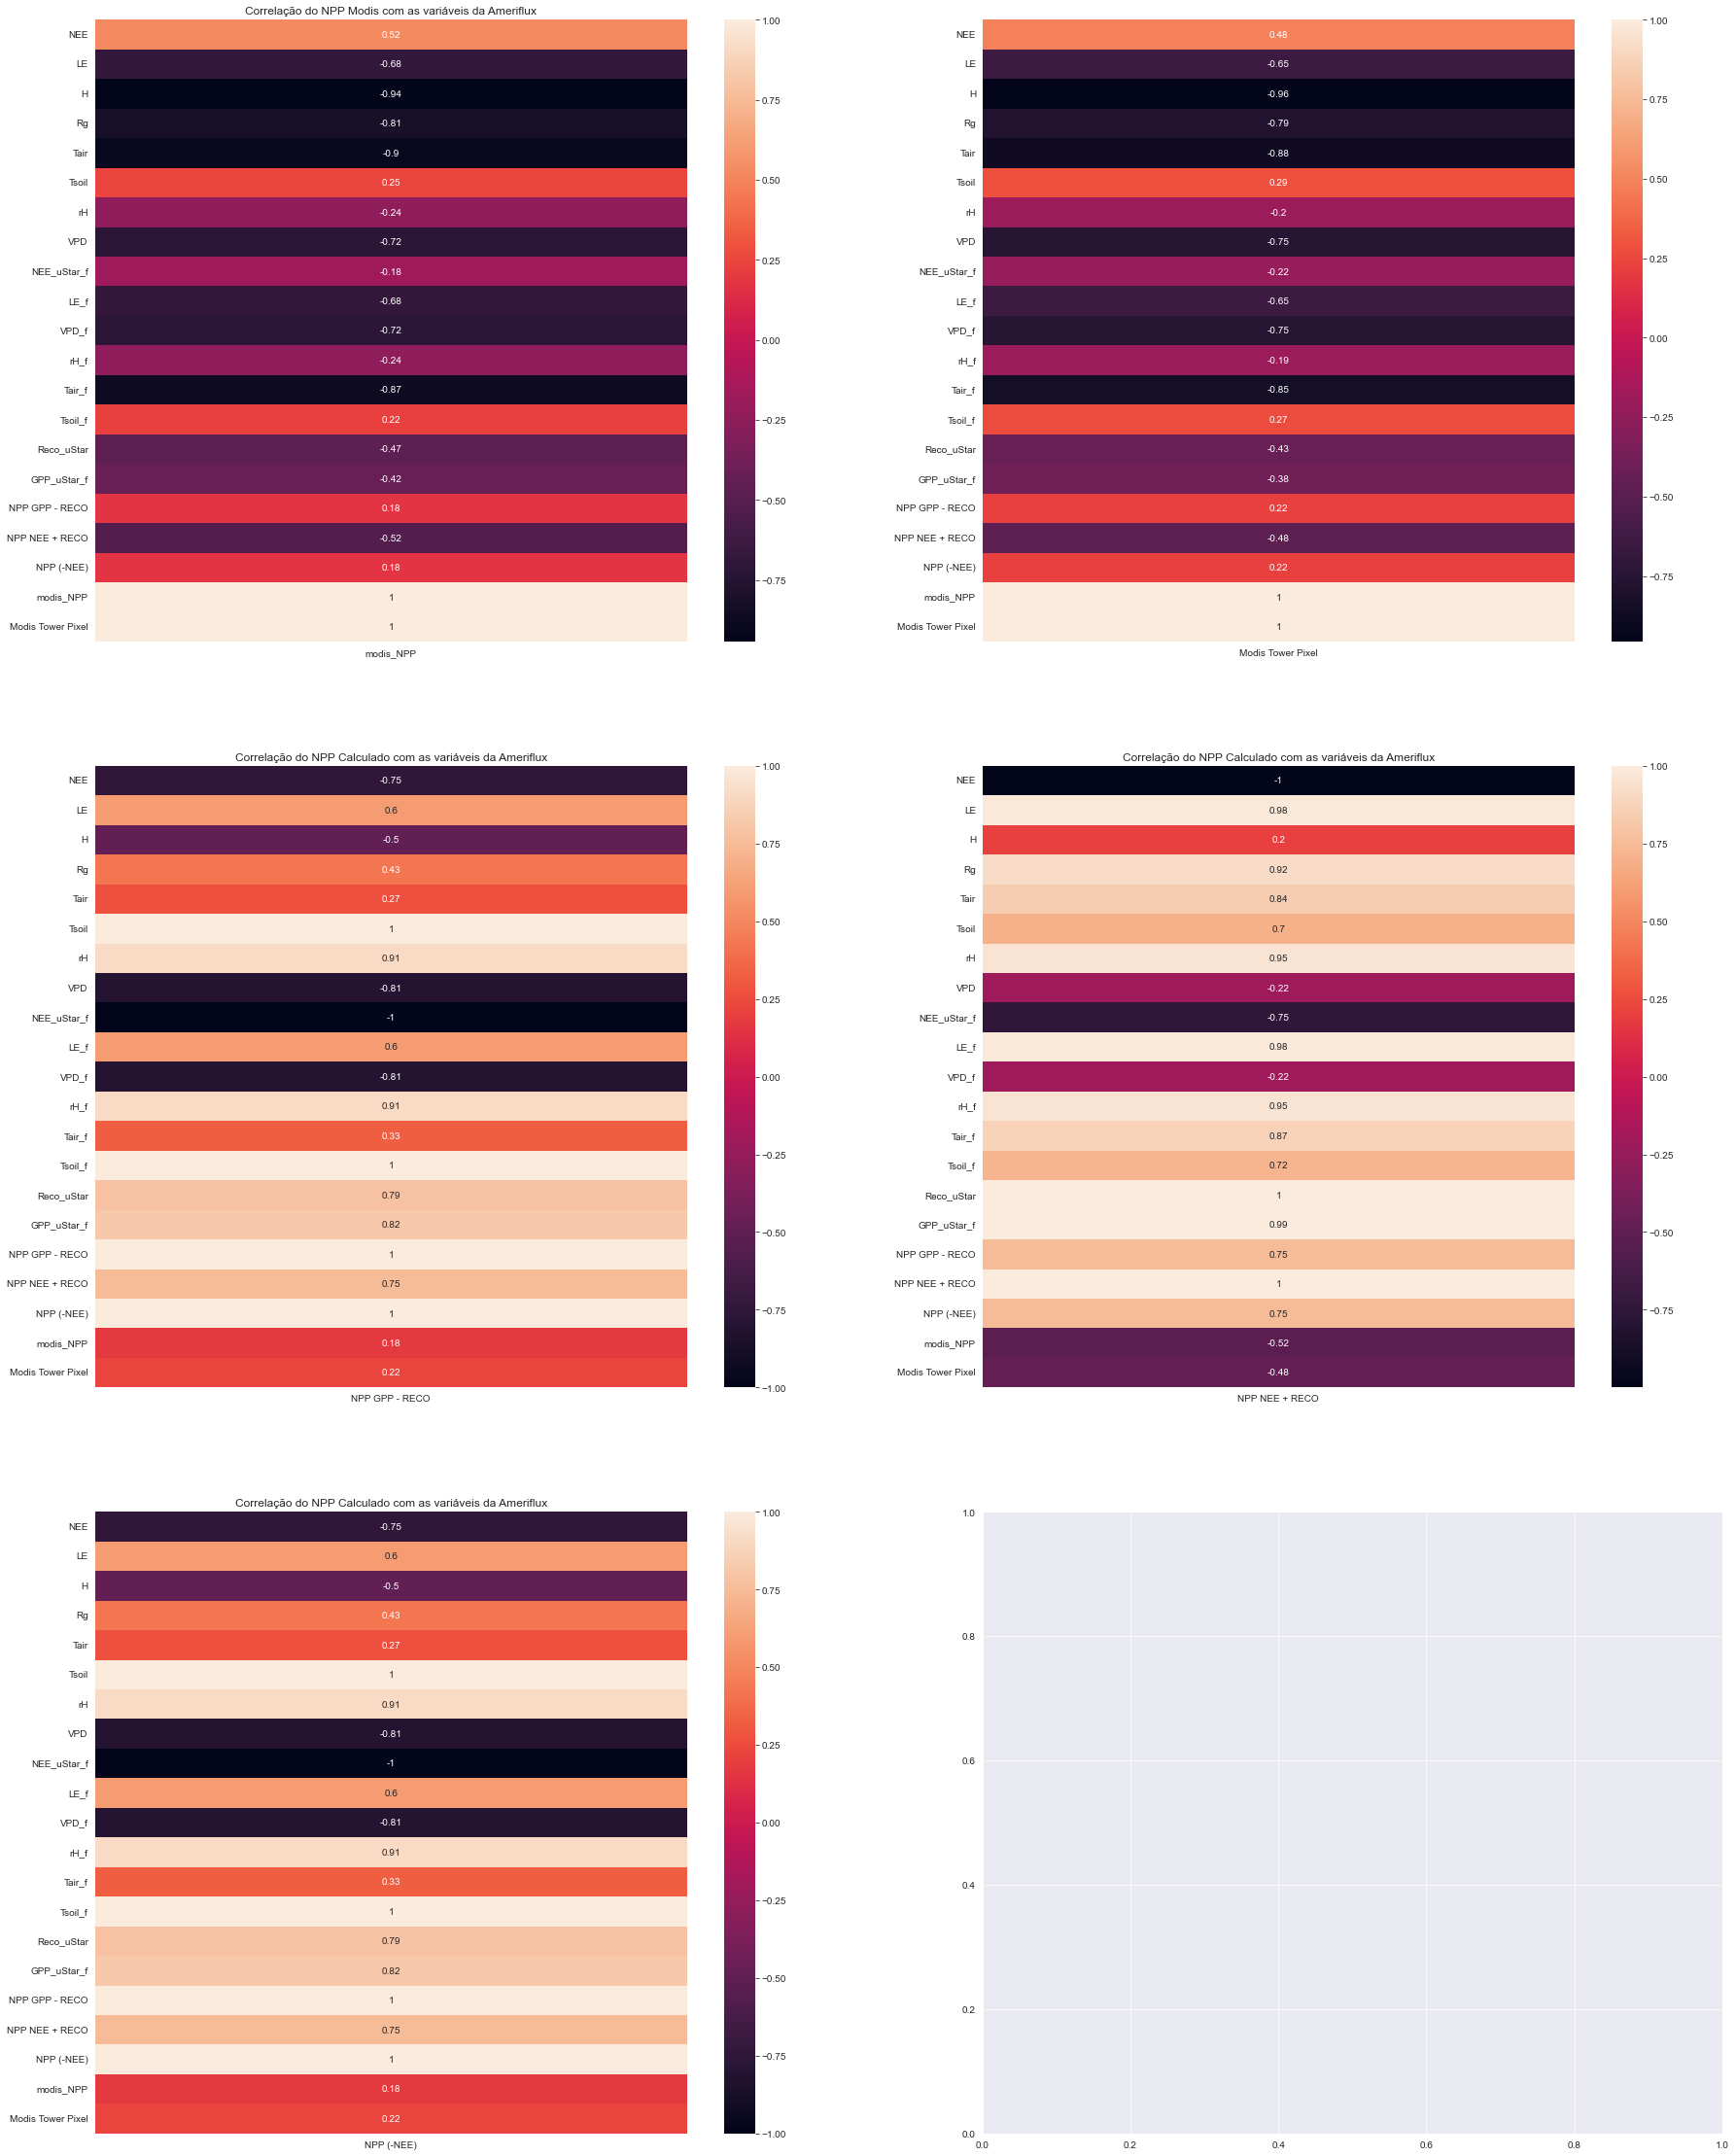

In [70]:
import seaborn as sns

subset_ameriflux = ameriflux[['NEE', 'LE', 'H', 'Rg', 'Tair', 'Tsoil', 'rH', 'VPD', 'NEE_uStar_f', 'LE_f', 'VPD_f', 'rH_f' ,'Tair_f','Tsoil_f','Reco_uStar','GPP_uStar_f','NPP GPP - RECO','NPP NEE + RECO', "NPP (-NEE)"]].reset_index(drop=True).copy()

modis_NPP = npp_dataframe['modis_NPP'].reset_index(drop=True).copy()
modis_NPP_torre = npp_dataframe['Modis Tower Pixel'].reset_index(drop=True).copy()

fig, axs = plt.subplots(3, 2, figsize=(30, 40))

# Concatene os DataFrames usando pd.concat
concatenated_df = pd.concat([subset_ameriflux, modis_NPP,modis_NPP_torre], axis=1)


sns.heatmap(concatenated_df.corr()['modis_NPP'].to_frame(),annot=True,ax=axs[0][0])
axs[0][0].set_title('Correlação do NPP Modis com as variáveis da Ameriflux')

sns.heatmap(concatenated_df.corr()['Modis Tower Pixel'].to_frame(), ax=axs[0][1],annot=True)
axs[1][0].set_title('Correlação do NPP do pixel da torre com as variáveis da Ameriflux')

sns.heatmap(concatenated_df.corr()['NPP GPP - RECO'].to_frame(), ax=axs[1][0],annot=True)
axs[1][0].set_title('Correlação do NPP Calculado com as variáveis da Ameriflux')

sns.heatmap(concatenated_df.corr()['NPP NEE + RECO'].to_frame(), ax=axs[1][1],annot=True)
axs[1][1].set_title('Correlação do NPP Calculado com as variáveis da Ameriflux')

sns.heatmap(concatenated_df.corr()['NPP (-NEE)'].to_frame(), ax=axs[2][0],annot=True)
axs[2][0].set_title('Correlação do NPP Calculado com as variáveis da Ameriflux')


plt.show()

In [125]:
# Temperature is one of the main climatic factors driving changes in the NPP,
# with obvious seasonal variation. In high latitudes, vegetation growth is periodic,
# and in humid and semi-humid areas, temperature promotes NPP growth by promoting photosynthesis of vegetation and the release of nutrients in soil.
# When the temperature is too high, it aggravates the transpiration of vegetation and decreases the NPP.


# In summary, from the perspective of a single climate factor, the relationship between NPP changes in forest vegetation and temperature in karst areas of southwest China is mainly positive, 
# the relationship with precipitation is complex and the relationship with VPD is negative.
# However, generally, temperature, precipitation and VPD affect NPP changes together, and the impact on the NPP also has a certain seasonality and lag. 
# In humid and semi-humid areas, temperature is the dominant factor, and precipitation is the dominant factor in arid, semi-arid and engineering water shortage areas. 
# In dry and hot seasons, temperature and precipitation affect the VPD and NPP. 
# In addition, the response of forest vegetation NPP to climate is also affected by topographic factors [74].
# For example, in high-altitude areas, due to the particularity of karst landforms, precipitation increases soil erosion, thus reducing vegetation NPP;
# water and soil loss is not easy in low-altitude areas, and precipitation promotes the increase in NPP.